In [2]:
import pandas as pd
df = pd.read_csv("final_named_and_final_cleaned_data_0_5_with_fram.csv")

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1347 non-null   int64  
 1   age               1347 non-null   int64  
 2   sex               1347 non-null   int64  
 3   painloc           1347 non-null   float64
 4   painexer          1347 non-null   float64
 5   relrest           1347 non-null   float64
 6   pncaden           1347 non-null   float64
 7   cp                1347 non-null   float64
 8   trestbps          1347 non-null   float64
 9   htn               1347 non-null   float64
 10  chol              1347 non-null   float64
 11  smoke             1347 non-null   float64
 12  cigs              1347 non-null   float64
 13  fbs               1347 non-null   float64
 14  dm                1347 non-null   int64  
 15  restecg           1347 non-null   float64
 16  dig               1347 non-null   float64


(None,
    Unnamed: 0  age  sex  painloc  painexer  relrest  pncaden   cp  trestbps  \
 0           0   63    1      1.0       1.0      1.0      3.0  1.0     145.0   
 1           1   67    1      1.0       1.0      1.0      3.0  4.0     160.0   
 2           2   67    1      1.0       1.0      1.0      3.0  4.0     120.0   
 3           3   37    1      1.0       1.0      1.0      3.0  3.0     130.0   
 4           4   41    0      1.0       0.0      1.0      1.0  2.0     130.0   
 
    htn  ...  ladprox  laddist  diag  cxmain  ramus  om1  om2  rcaprox  \
 0  1.0  ...      1.0      1.0   1.0     1.0    1.0  1.0  1.0      1.0   
 1  1.0  ...      2.0      2.0   1.0     2.0    1.0  1.0  1.0      1.0   
 2  1.0  ...      1.0      1.0   1.0     1.0    1.0  1.0  1.0      2.0   
 3  0.0  ...      1.0      1.0   1.0     1.0    1.0  1.0  1.0      1.0   
 4  1.0  ...      1.0      1.0  -1.0     1.0   -1.0  1.0 -1.0      1.0   
 
    rcadist  framingham_score  
 0      1.0                18  
 

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

df_cleaned = df.drop(columns=["Unnamed: 0"])

# Statystyki opisowe
stats = pd.DataFrame({
    "mean": df_cleaned.mean(),
    "std": df_cleaned.std(),
    "skewness": df_cleaned.skew(),
    "kurtosis": df_cleaned.kurtosis()
})


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

pca = PCA()
pca_result = pca.fit(scaled_data)

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(len(pca.components_))],
                        index=df_cleaned.columns)

print(stats)
print(loadings)

                        mean        std  skewness   kurtosis
age                53.288048   9.827118 -0.181585  -0.478146
sex                 0.795100   0.403778 -1.463868   0.143120
painloc             0.923534   0.265841 -3.191103   8.195307
painexer            0.573125   0.494807 -0.296011  -1.915223
relrest             0.714922   0.451619 -0.953200  -1.093036
pncaden             2.273942   0.991762 -0.926517  -0.624448
cp                  3.155902   0.967242 -0.794332  -0.556291
trestbps          131.010393  17.835301  0.598290   0.709559
htn                 0.476615   0.499638  0.093748  -1.994174
chol              246.980074  56.947039  1.267089   4.997077
smoke               0.527097   0.499451 -0.108670  -1.991150
cigs               13.042316  15.328028  1.354427   2.689970
fbs                 0.207127   0.405398  1.447016   0.093993
dm                  0.125464   0.331367  2.263910   3.129935
restecg             0.631032   0.768831  0.738940  -0.934369
dig                 0.03

C:\Users\emiar\AppData\Local\Temp\ipykernel_17340\895361332.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x_loadings[i], y_loadings[i], var, fontsize=9)


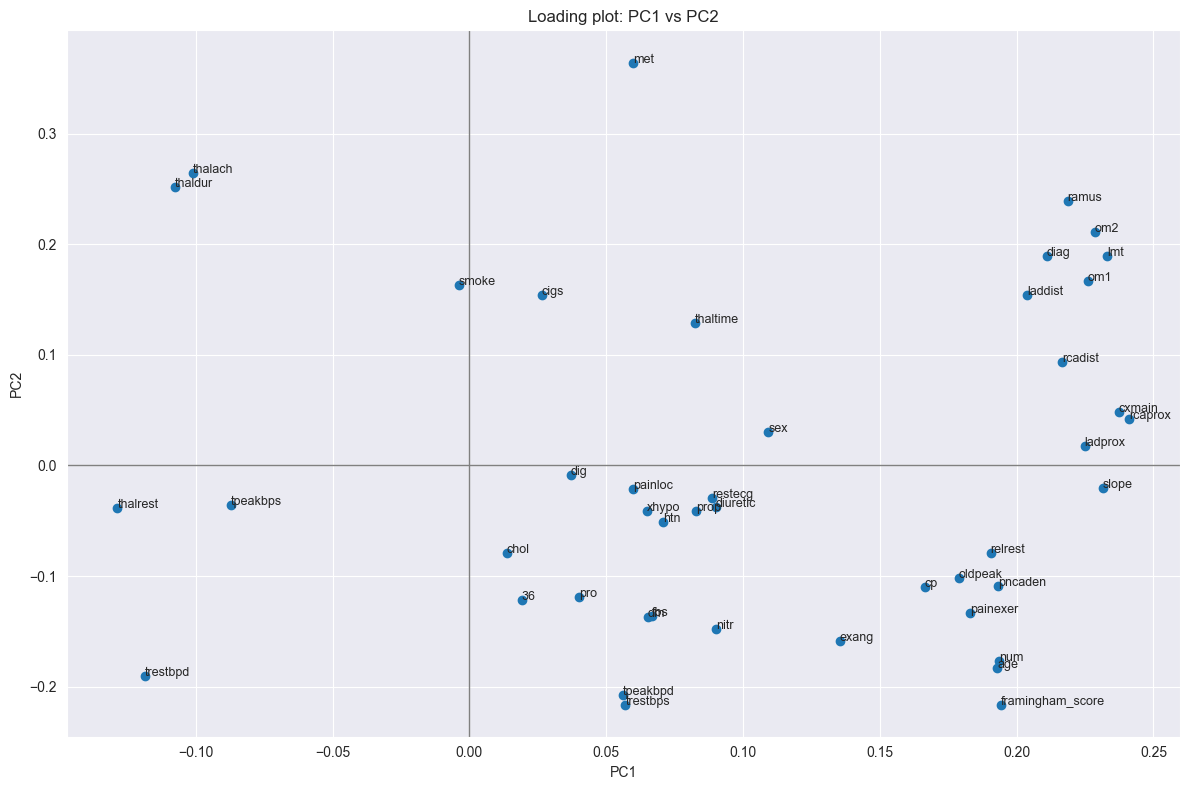

In [5]:
import matplotlib.pyplot as plt

x_loadings = loadings["PC1"]
y_loadings = loadings["PC2"]

plt.figure(figsize=(12, 8))
plt.scatter(x_loadings, y_loadings)

for i, var in enumerate(loadings.index):
    plt.text(x_loadings[i], y_loadings[i], var, fontsize=9)

plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.title("Loading plot: PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


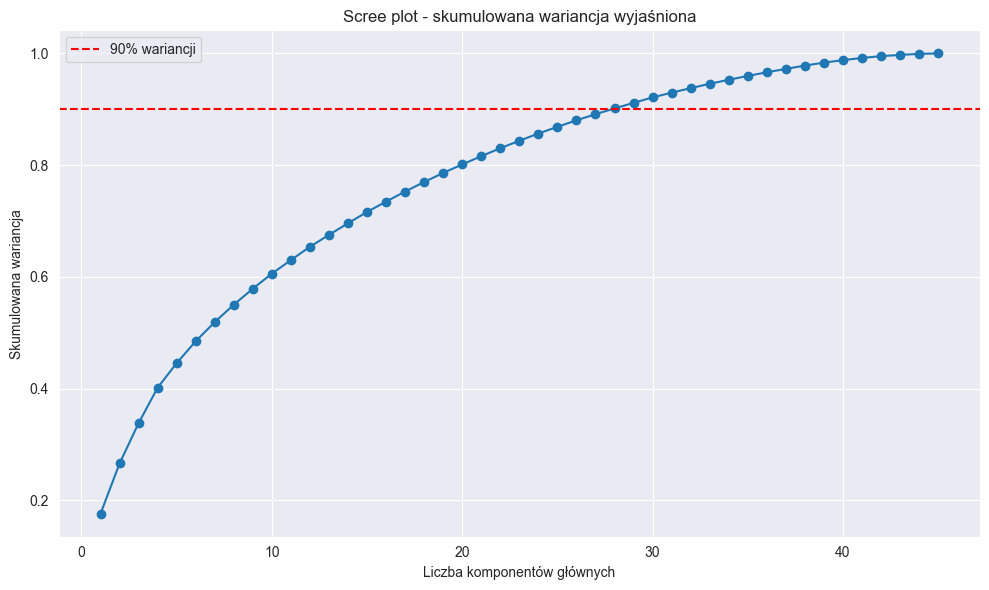

28

In [6]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% wariancji')
plt.title('Scree plot - skumulowana wariancja wyjaśniona')
plt.xlabel('Liczba komponentów głównych')
plt.ylabel('Skumulowana wariancja')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Znalezienie minimalnej liczby komponentów wyjaśniających >=90% wariancji
optimal_components = np.argmax(explained_variance >= 0.9) + 1
optimal_components


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Skalowanie danych
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=["Unnamed: 0"]))

# PCA
pca = PCA(n_components=28)
pca_result = pca.fit_transform(scaled_data)


In [8]:
from sklearn.cluster import KMeans

# Wybór liczby klastrów (np. 3)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_result)


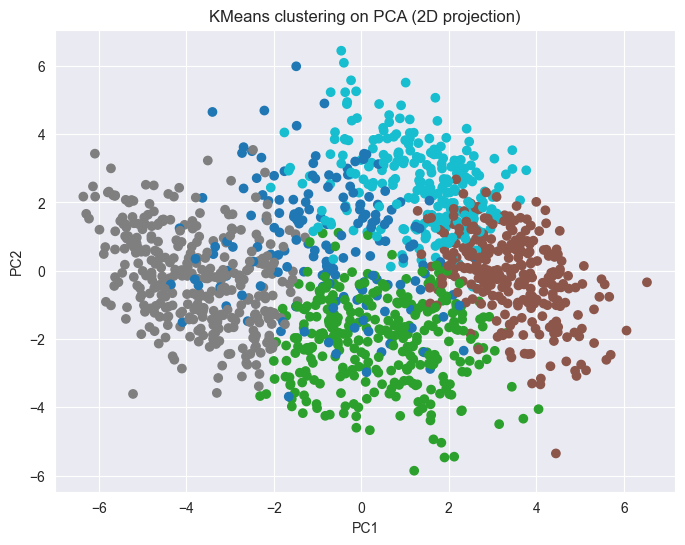

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='tab10')
plt.title("KMeans clustering on PCA (2D projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


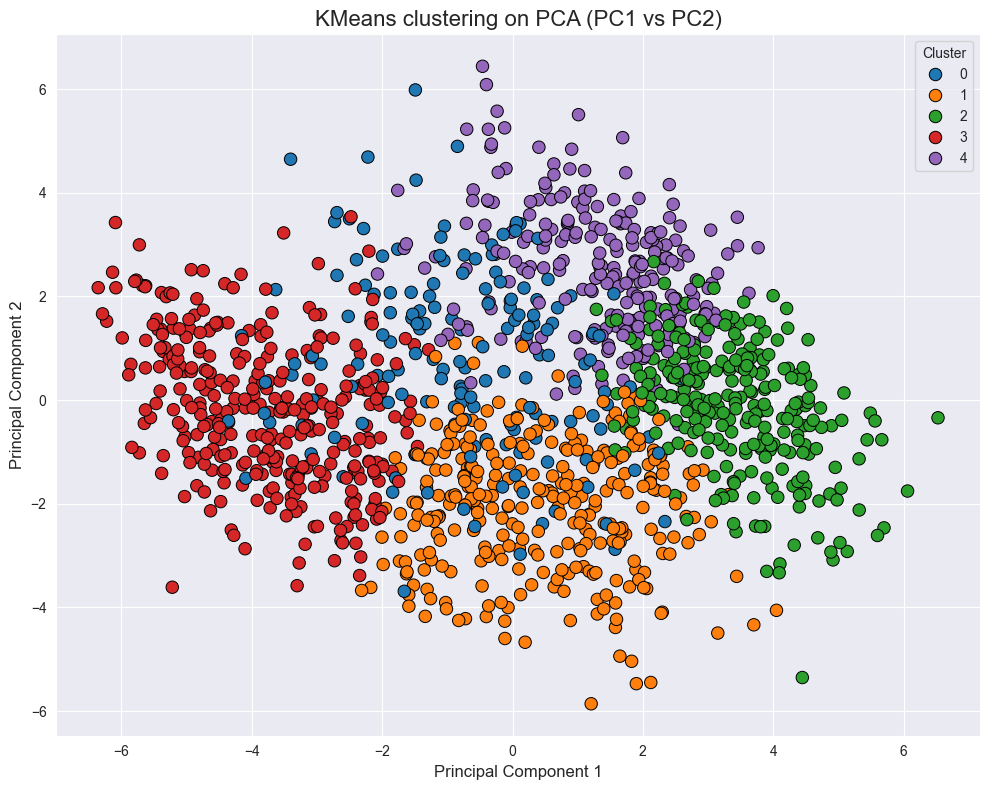

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_plot = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Cluster': clusters
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_plot,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    s=80, edgecolor='black'
)
plt.title("KMeans clustering on PCA (PC1 vs PC2)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

for c in sorted(df_with_clusters['Cluster'].unique()):
    print(f"\n--- Cluster {c} ---")
    display(df_with_clusters[df_with_clusters['Cluster'] == c].head(10))

df_with_clusters.groupby('Cluster').mean()


--- Cluster 0 ---


,Unnamed: 0,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,framingham_score,Cluster
4,4,41,0,1.0,0.0,1.0,1.0,2.0,130.0,1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,9,0
11,11,56,0,1.0,0.0,0.0,1.0,2.0,140.0,0.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,15,0
21,21,58,0,1.0,0.0,1.0,3.0,1.0,150.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,15,0
26,26,58,0,1.0,0.0,0.0,1.0,3.0,120.0,1.0,...,1.0,3.0,1.0,-1.0,1.0,3.0,1.0,1.0,13,0
30,30,69,0,1.0,0.0,1.0,3.0,1.0,140.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,19,0
42,42,71,0,1.0,0.0,1.0,3.0,2.0,160.0,0.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,22,0
44,44,61,0,1.0,0.0,0.0,1.0,4.0,130.0,1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,2.0,15,0
50,50,41,0,1.0,0.0,0.0,1.0,2.0,105.0,1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,8,0
61,61,46,0,1.0,0.0,0.0,1.0,3.0,142.0,0.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,11,0
63,63,54,0,1.0,0.0,0.0,1.0,3.0,135.0,0.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,15,0



--- Cluster 1 ---


,Unnamed: 0,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,framingham_score,Cluster
6,6,62,0,1.0,1.0,1.0,3.0,4.0,140.0,0.0,...,1.0,1.0,1.0,-1.0,2.0,-1.0,2.0,1.0,16,1
9,9,53,1,1.0,1.0,1.0,3.0,4.0,140.0,0.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,2.0,1.0,15,1
32,32,64,1,1.0,1.0,1.0,3.0,3.0,140.0,0.0,...,1.0,-1.0,2.0,-1.0,1.0,-1.0,1.0,1.0,17,1
36,36,43,1,1.0,1.0,1.0,3.0,4.0,120.0,1.0,...,1.0,-1.0,2.0,-1.0,1.0,-1.0,1.0,2.0,9,1
40,40,65,0,1.0,1.0,1.0,3.0,4.0,150.0,0.0,...,1.0,-1.0,1.0,-1.0,2.0,-1.0,1.0,1.0,17,1
60,60,51,0,1.0,1.0,1.0,3.0,4.0,130.0,0.0,...,1.0,-1.0,1.0,-1.0,2.0,-1.0,2.0,1.0,13,1
62,62,58,1,1.0,1.0,1.0,3.0,4.0,128.0,1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,2.0,1.0,15,1
75,75,65,0,1.0,1.0,1.0,3.0,3.0,160.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,18,1
77,77,51,0,1.0,1.0,1.0,3.0,3.0,140.0,1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,16,1
97,97,60,0,1.0,1.0,1.0,3.0,4.0,150.0,0.0,...,2.0,-1.0,2.0,-1.0,2.0,-1.0,2.0,1.0,18,1



--- Cluster 2 ---


,Unnamed: 0,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,framingham_score,Cluster
1,1,67,1,1.0,1.0,1.0,3.0,4.0,160.0,1.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,20,2
2,2,67,1,1.0,1.0,1.0,3.0,4.0,120.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,17,2
8,8,63,1,1.0,1.0,1.0,3.0,4.0,130.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,16,2
24,24,60,1,1.0,1.0,1.0,3.0,4.0,130.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,17,2
27,27,66,0,1.0,1.0,1.0,3.0,1.0,150.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17,2
29,29,40,1,1.0,1.0,1.0,3.0,4.0,110.0,0.0,...,2.0,-1.0,1.0,-1.0,2.0,-1.0,2.0,1.0,6,2
37,37,57,1,1.0,1.0,1.0,3.0,4.0,150.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,18,2
38,38,55,1,1.0,1.0,1.0,3.0,4.0,132.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,17,2
47,47,50,1,1.0,1.0,1.0,3.0,4.0,150.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,16,2
48,48,65,0,1.0,1.0,1.0,3.0,3.0,140.0,0.0,...,1.0,3.0,1.0,-1.0,1.0,3.0,1.0,1.0,18,2



--- Cluster 3 ---


,Unnamed: 0,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,framingham_score,Cluster
303,303,40,1,1.0,0.0,0.0,1.0,2.0,140.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,13,3
304,304,49,0,1.0,0.0,0.0,1.0,3.0,160.0,1.0,...,2.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11,3
305,305,37,1,1.0,0.0,0.0,1.0,2.0,130.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9,3
308,308,39,1,1.0,0.0,1.0,2.0,3.0,120.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8,3
310,310,54,1,1.0,0.0,0.0,1.0,2.0,110.0,0.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,12,3
312,312,48,0,1.0,0.0,0.0,1.0,2.0,120.0,0.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11,3
313,313,37,0,1.0,0.0,1.0,2.0,3.0,130.0,0.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8,3
315,315,39,1,1.0,0.0,0.0,1.0,2.0,120.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7,3
317,317,42,0,1.0,0.0,1.0,2.0,3.0,115.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7,3
318,318,54,0,1.0,1.0,0.0,2.0,2.0,120.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,12,3



--- Cluster 4 ---


,Unnamed: 0,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,framingham_score,Cluster
0,0,63,1,1.0,1.0,1.0,3.0,1.0,145.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18,4
3,3,37,1,1.0,1.0,1.0,3.0,3.0,130.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7,4
5,5,56,1,1.0,0.0,1.0,3.0,2.0,120.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15,4
7,7,57,0,1.0,0.0,1.0,3.0,4.0,120.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,13,4
10,10,57,1,1.0,1.0,1.0,3.0,4.0,140.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16,4
12,12,56,1,1.0,1.0,1.0,2.0,3.0,130.0,0.0,...,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,20,4
13,13,44,1,1.0,0.0,1.0,3.0,2.0,120.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11,4
14,14,52,1,1.0,1.0,1.0,3.0,3.0,172.0,0.0,...,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,14,4
15,15,57,1,1.0,0.0,1.0,3.0,3.0,150.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16,4
16,16,48,1,1.0,1.0,1.0,3.0,2.0,110.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,8,4


,Unnamed: 0,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,framingham_score
Cluster,,,,,,,,,,,,,,,,,,,,,
0,643.578313,55.265060,0.524096,0.614458,0.024096,0.084337,0.771084,2.108434,131.951807,0.548193,...,0.963855,0.795181,0.024096,1.114458,-0.439759,0.518072,-0.373494,1.132530,0.662651,13.855422
1,768.025559,55.872204,0.830671,0.974441,0.894569,0.968051,2.913738,3.642173,135.849840,0.492013,...,1.054313,0.223642,-0.629393,0.747604,-0.923323,-0.038339,-0.932907,0.900958,0.217252,15.051118
2,753.863799,60.265233,0.949821,0.989247,0.867384,0.949821,2.824373,3.788530,132.681004,0.534050,...,1.469534,1.200717,1.043011,1.487455,0.767025,1.229391,0.942652,1.612903,1.204301,16.222222
3,722.489736,46.266862,0.683284,0.920821,0.304985,0.442815,1.718475,2.730205,127.354839,0.337243,...,-0.627566,-0.662757,-0.879765,-0.809384,-0.947214,-0.824047,-0.994135,-0.777126,-0.768328,11.073314
4,413.741935,50.508065,0.911290,0.995968,0.572581,0.927419,2.616935,3.116935,127.419355,0.536290,...,1.161290,1.205645,0.955645,1.165323,0.745968,1.064516,0.689516,1.157258,1.052419,12.899194


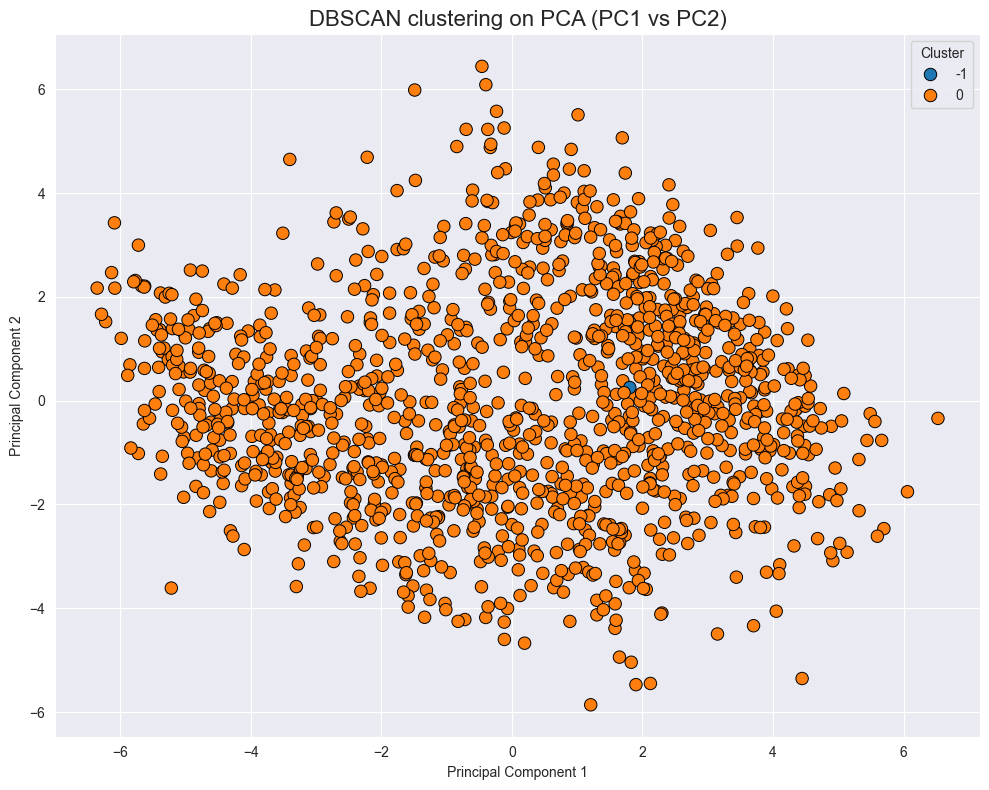

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DBSCAN - parametry do eksperymentowania:
# eps = promień sąsiedztwa
# min_samples = minimalna liczba punktów w sąsiedztwie, by utworzyć klaster
dbscan = DBSCAN(eps=8, min_samples=5)
db_labels = dbscan.fit_predict(pca_result)

# Dodanie etykiet do DataFrame
df_dbscan = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Cluster': db_labels
})

# Wizualizacja
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_dbscan, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=80, edgecolor='black')
plt.title("DBSCAN clustering on PCA (PC1 vs PC2)", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


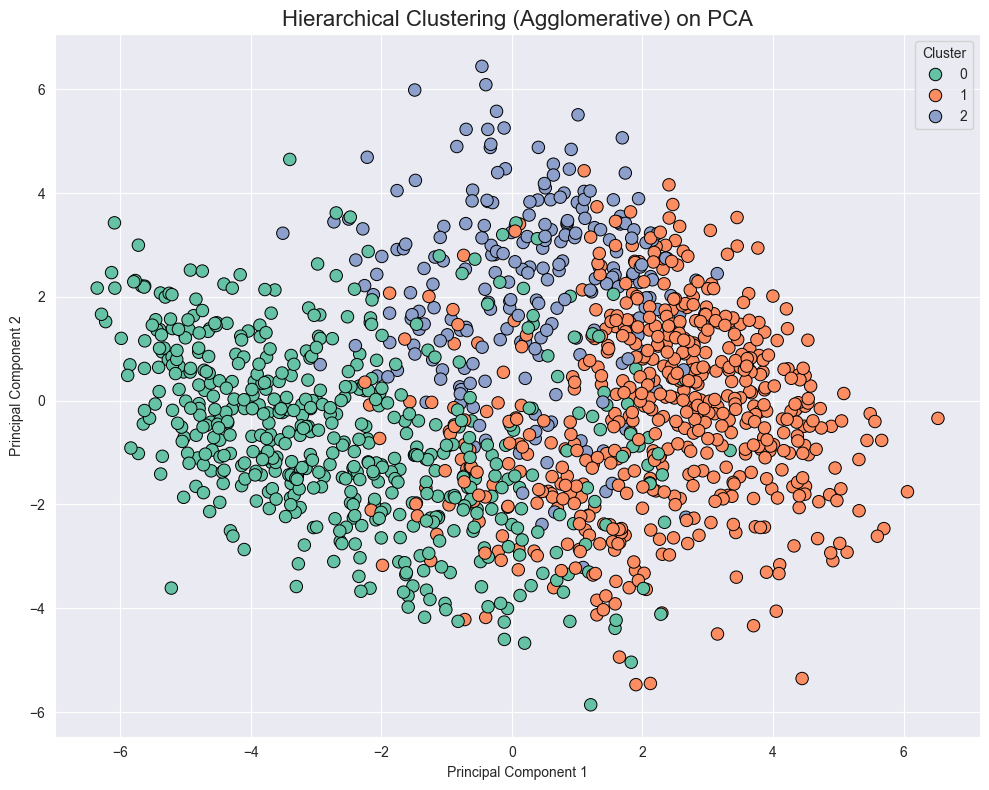

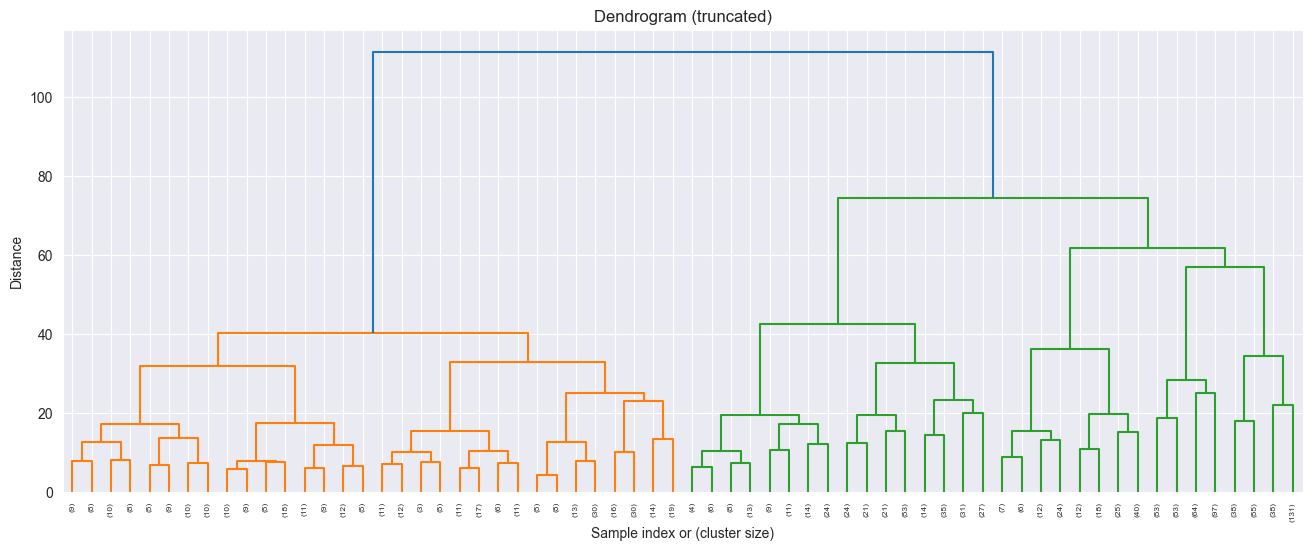

In [16]:
from sklearn.cluster import AgglomerativeClustering
pca = PCA(n_components=28)
pca_28_result = pca.fit_transform(scaled_data)
# Zakładamy, że pca_28_result to dane po PCA zredukowane do 28 wymiarów
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(pca_28_result)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_agglo = pd.DataFrame({
    'PC1': pca_28_result[:, 0],
    'PC2': pca_28_result[:, 1],
    'Cluster': agglo_labels
})

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_agglo, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=80, edgecolor='black')
plt.title("Hierarchical Clustering (Agglomerative) on PCA", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
from scipy.cluster.hierarchy import linkage, dendrogram

# Użyjemy tylko kilku głównych komponentów do rysunku (np. 6), by nie przeciążać
linkage_matrix = linkage(pca_28_result[:, :6], method='ward')

plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()
